In [ ]:
from time import time,sleep
# print(time())
while True:
    sleep(3600)
    print(time())

1561781433.5394952
1561785033.6848516
1561788633.811231
1561792233.9726322


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re, string
import sys
import pickle
import warnings
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('C:/Users/nwang/Desktop/nlp/code/tag_cl_version2.pkl', 'rb') as infile:
    df=pickle.load(infile)

In [3]:
df.head(5)

,Accuracy,ATM,Business_Services,Cards,Communication,Community,Credit_Union_Difference,Denied_Loan,Do_Not_Recommend,Ease_Of_Use,...,Refreshments,Reputation_Love,Satisfied,Service_Quality,Statements,Survey_General,Video_Tellers,Wait_Time,x,text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,Mixed,"The interest rates are nice, but Alliant has p..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive,"Good rates, fast transfers"
2,NaN,Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Great interest rates on both checking and savi...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,"Very convenient, and great rates"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Positive,NaN,NaN,NaN,NaN,Positive,"Excellent rates, service, website"


In [ ]:
q1=df.iloc[:13791,['x','text']]
q2=df.iloc[:13791,['x','text']]

In [12]:
df[df['text']=='Representatives are very knowledgeable and if they don\'t know the answer they try to get an answer for you immediately.'].index

Int64Index([13790], dtype='int64')

In [54]:
def clen(x):
    return len(x.split())

In [108]:
df['xlen'] = df['text'].apply(clen)

In [109]:
df=df.loc[df['xlen']==10]

In [ ]:
np.asarray(text)

In [110]:
y_3=df['x'].loc[df['x']==3].values[:100]
x_3=df['text'].loc[df['x']==3].values[:100]
y_2=df['x'].loc[df['x']==2].values[:100]
x_2=df['text'].loc[df['x']==2].values[:100]
y_1=df['x'].loc[df['x']==1].values[:100]
x_1=df['text'].loc[df['x']==1].values[:100]
y_0=df['x'].loc[df['x']==0].values[:100]
x_0=df['text'].loc[df['x']==0].values[:100]

In [111]:
y=np.append(np.append(y_3,y_2),np.append(y_1,y_0))
x=np.append(np.append(x_3,x_2),np.append(x_1,x_0))
len(x),len(y)

(247, 247)

(array(['We are very happy and satisfied with Alliant Credit Union',
        'Interest rates on savings is higher than most other banks',
        'Excellent service Helpful when transferring funds All around excellent service',
        'Good rates helpful feels like you re on my side',
        'Never had any problems here much better rates than banks',
        'very secured and always help if you have a problem',
        'Customer Service at SM Branch is always helpful and courteous',
        'The credit Unionhas always been very helpful with my problems',
        'very good service and fair interest return to the CD',
        'Because I have recommended people and they have opened accounts'],
       dtype=object), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))

## LSTM

In [7]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation
from sklearn.model_selection import train_test_split
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
from keras.layers import Dense, Input, Dropout, LSTM, Activation, Embedding
from keras.preprocessing import sequence
np.random.seed(1)

Using TensorFlow backend.


In [7]:
def sigmoid(Z):
    '''sigmoid function for matrix Z'''
    return 1/(1 + np.exp(-Z))

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def read_glove_vec(glove_file):
    with open(glove_file,encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        for w in sorted(words):
            words_to_index[w] = i
            i = i + 1
    return words_to_index, word_to_vec_map

In [112]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.3,shuffle=True,random_state=67)
maxlen = len(max(x, key=len).split())
print(maxlen)

10


In [8]:
word_to_index, word_to_vec_map = read_glove_vec('C:/Users/nwang/Desktop/nlp/glove.6B.50d.txt')

In [11]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    
    # Keras requires vocab length start from index 1
    vocab_len = len(word_to_index) + 1  
    emb_dim = list(word_to_vec_map.values())[0].shape[0]
    
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    return Embedding(
        input_dim=vocab_len, 
        output_dim=emb_dim, 
        trainable=False,  # Indicating this is a pre-trained embedding 
        weights=[emb_matrix])

In [62]:
def np_model(input_shape, word_to_vec_map, word_to_index):
    # Input layer
    sentence_indices = Input(shape=input_shape, dtype='int32')
    
    # Embedding layer
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)   
    
    # 2-layer LSTM
    X = LSTM(128, return_sequences=True, recurrent_dropout=0.5)(embeddings)  # N->N RNN
    X = Dropout(0.5)(X)
    X = LSTM(128, return_sequences=True, recurrent_dropout=0.5)(embeddings)  # N->N RNN
    X = Dropout(0.5)(X)
    X = LSTM(128, recurrent_dropout=0.5)(X)  # N -> 1 RNN
    X = Dropout(0.5)(X)
    X = Dense(4, activation='softmax')(X)
    
    # Create and return model
    model = Model(inputs=sentence_indices, outputs=X)
    
    return model

In [63]:
model = np_model((maxlen,), word_to_vec_map, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 128)           91648     
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total para

In [64]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
#     metrics=[auc])
    metrics=['accuracy'])

In [4]:
def sentences_to_indice(X, word_to_index, max_len):
    m = X.shape[0]
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):
        sentence_words = X[i].lower().split()
        j = 0
        for w in sentence_words:
            try:
                X_indices[i, j] = word_to_index[w]
                j = j + 1
            except:
                X_indices[i, j] = word_to_index['unk']
                j = j + 1
         
    return X_indices

In [113]:
X_train_indices = sentences_to_indice(X_train, word_to_index, maxlen)
X_test_indices = sentences_to_indice(X_test, word_to_index, maxlen)

In [67]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [114]:
Y_train_oh = convert_to_one_hot(Y_train, C = 4)
Y_test_oh = convert_to_one_hot(Y_test, C = 4)

In [115]:
history = model.fit(
    X_train_indices, 
    Y_train_oh, 
    epochs = 50, 
    batch_size = 32, 
    shuffle=True)

Epoch 1/50
172/172 [==============================] - 0s 3ms/step - loss: 0.0235 - acc: 0.9942
Epoch 2/50
172/172 [==============================] - 0s 3ms/step - loss: 0.0060 - acc: 1.0000
Epoch 3/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0137 - acc: 0.9942
Epoch 4/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0105 - acc: 1.0000
Epoch 5/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0084 - acc: 1.0000
Epoch 6/50
172/172 [==============================] - 0s 3ms/step - loss: 0.0148 - acc: 1.0000
Epoch 7/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0167 - acc: 0.9942
Epoch 8/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0234 - acc: 0.9884
Epoch 9/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0176 - acc: 0.9942
Epoch 10/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0224 - acc: 0.9884
Epoch 11/50
172/172 [============================

In [116]:
import h5py
with open('C:/Users/nwang/Desktop/nlp/model/10x_model.json', 'w') as fp:
    fp.write(model.to_json())
model.save_weights('C:/Users/nwang/Desktop/nlp/model/10x_model.h5')

75/75 [==============================] - 0s 833us/step


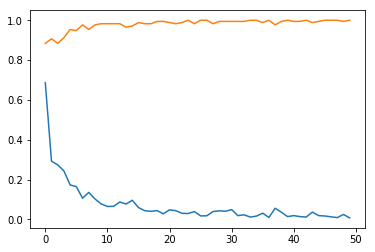

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

loss, acc = model.evaluate(X_test_indices, Y_test_oh)

In [12]:
from keras.models import model_from_json

with open('C:/Users/nwang/Desktop/nlp/model/10x_model.json','r') as fp:
    xmodel=model_from_json(fp.read())
xmodel.load_weights('C:/Users/nwang/Desktop/nlp/model/10x_model.h5')

xmodel.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
#     metrics=[auc])
    metrics=['accuracy'])

In [117]:
model.evaluate(X_train_indices,Y_train_oh )

172/172 [==============================] - 0s 958us/step


[0.00017713825726004448, 1.0]

In [118]:
model.evaluate(X_test_indices,Y_test_oh )

75/75 [==============================] - 0s 1ms/step


[0.7869272623956204, 0.8266666666666667]

In [18]:
import numpy as np
maxlen=10
one_test = np.array(['at this moment i do not see any improvement needed'])
one_index= sentences_to_indice(one_test, word_to_index, maxlen)
np.argmax(xmodel.predict(one_index))

2

In [119]:
X_test[:6],Y_test[:6]

(array(['How can you be a member without working for ual',
        'have not had much experience on using this account yet',
        'You have a great team of people working Great company',
        'Not available in Arizona too difficult to use as primary',
        'No notification communication about my checking account changes very disappointing',
        'at this moment i do not see any improvement needed'], dtype=object),
 array([1, 2, 3, 1, 1, 2]))